In [ ]:
## Based on notebooks shared by Portik et al. (2022) https://osf.io/g8fph/files/osfstorage
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [ ]:
# Paths to the kreport files
centrifuge="results/CENTRIFUGE/CENTRIFUGE.Zymo-5000_LONG.centrifuge.kreport"
kaiju="results/KAIJU/KAIJU.Zymo-5000_LONG_kraken_report.txt"
centrifuger="results/CENTRIFUGER/CENTRIFUGER.Zymo-5000_LONG_kreport_annotated"
kraken="results/KRAKEN/KRAKEN.Zymo-5000_LONG.report.txt"
diamond="results/DIAMOND/DIAMOND.Zymo-5000_LONG_kraken_report.txt"
megan="results/MEGAN/MEGAN.Zymo-5000_LONG_kraken_style_report.tsv"


files = [kraken, centrifuger, centrifuge, kaiju, diamond, megan] # bracken will not be reported

total_reads = 5000    

label = "5K_ZM Long (length-adjusted)"
if not os.path.exists(label):
    os.mkdir(label)
# set minimum detection threshold 
detect_dict = {'0.001-perc': int(0.00001*total_reads),
               '0.1-perc': int(0.001*total_reads),
               '1-perc': int(0.01*total_reads)}

threshold = {'0.001-perc': .001,
               '0.1-perc': .1,
               '1-perc': 1}

# change this to generate results for other filtering threshold
dlevel = '0.001-perc'

for k, v in detect_dict.items():
    print(k, '=', v)

0.001-perc = 0
0.1-perc = 5
1-perc = 50


In [152]:
# need to account for some differences in taxonomy for one of the Zymo species
# here, Lactobacillus fermentum = Limosilactobacillus fermentum
zymo_species = ['Pseudomonas aeruginosa','Escherichia coli',
                'Salmonella enterica','Limosilactobacillus fermentum',
                'Enterococcus faecalis','Staphylococcus aureus',
                'Listeria monocytogenes','Bacillus subtilis',
                'Saccharomyces cerevisiae','Cryptococcus neoformans']

zymo_genera = ['Pseudomonas','Escherichia',
               'Salmonella','Limosilactobacillus',
               'Enterococcus','Staphylococcus',
               'Listeria','Bacillus',
               'Saccharomyces','Cryptococcus']

theoretical_dists = [0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.12, 0.02, 0.02, 0]

In [153]:
# this will create data structures for the total read counts at each rank
# and the number of unique taxa at each rank level
rank_read_count_dict, rank_taxa_count_dict = {}, {}

# make a list of the file name prefixes, this will be recycled a lot
fname_list = []

for f in files:
    # get name of file for dict keys
    fname = f.split('/')[-1].split('.')[0]
    fname_list.append(fname)
    
    # insert dict key with empty list
    rank_read_count_dict[fname] = []
    rank_taxa_count_dict[fname] = []
    
    # create dataframe
    df = pd.read_csv(f, sep = '\t', header=None,
                     names = ['proportion', 'cumulative_count', 'level_count', 'rank', 'taxid', 'name'])
    df['name'] = df['name'].str.strip()
    df['rank'] = df['rank'].astype(str).str.strip()
    df['name'] = df['name'].str.replace("_", " ")
    
    # iterate over desired ranks
    for r in ['S1', 'S', 'G', 'F', 'O', 'C']:
        
        # get number of reads assigned to all taxa at this rank level
        # we use level counts rather than cumulative counts here
        ########################################################################
        rank_readtotal = round((df.loc[df['rank'] == r, 'level_count'].sum() / total_reads) * 100, 1)
        # add to dictionary list
        rank_read_count_dict[fname].append(rank_readtotal)

        # get number of unique names per rank
        rank_namecount = (df['rank'] == r).sum()
        # add to dictionary list
        rank_taxa_count_dict[fname].append(rank_namecount)

df

,proportion,cumulative_count,level_count,rank,taxid,name
0,4.05,187.0,3.0,K,172,Fungi
1,92.77,4284.0,221.0,D,1,Bacteria
2,8.27,382.0,6.0,D,171,Eukaryota
3,61.93,2860.0,17.0,P,10,Firmicutes
4,26.03,1202.0,12.0,P,112,Proteobacteria
...,...,...,...,...,...,...
90,0.02,1.0,1.0,S,60,Staphylococcus capitis
91,6.76,312.0,312.0,S,59,Staphylococcus aureus
92,0.04,2.0,2.0,S,51,Listeria welshimeri
93,7.21,333.0,333.0,S,49,Listeria monocytogenes


In [154]:
# look at dictionary structure
rank_read_count_dict

{'KRAKEN': [6.3, 74.7, 9.4, 1.5, 0.0, 0.1],
 'CENTRIFUGER': [0.0, 91.3, 2.0, 0.3, 0.1, 0.3],
 'CENTRIFUGE': [0.0, 75.3, 2.7, 1.5, 0.1, 0.1],
 'KAIJU': [0.0, 30.2, 37.9, 5.4, 1.2, 4.8],
 'DIAMOND': [7.2, 7.6, 17.1, 17.3, 2.4, 8.5],
 'MEGAN': [0.0, 52.8, 21.6, 6.5, 0.8, 2.8]}

In [155]:
# convert dictionary to dataframe and insert new column in with rank names
# do for read counts
df_rank_read_count = pd.DataFrame.from_dict(rank_read_count_dict)
df_rank_read_count.insert(0, 'Rank', ['S1', 'S', 'G', 'F', 'O', 'C'])

# same for taxa counts
df_rank_taxa_count = pd.DataFrame.from_dict(rank_taxa_count_dict)
df_rank_taxa_count.insert(0, 'Rank', ['S1', 'S', 'G', 'F', 'O', 'C'])
# look at resulting dataframe
df_rank_read_count

,Rank,KRAKEN,CENTRIFUGER,CENTRIFUGE,KAIJU,DIAMOND,MEGAN
0,S1,6.3,0.0,0.0,0.0,7.2,0.0
1,S,74.7,91.3,75.3,30.2,7.6,52.8
2,G,9.4,2.0,2.7,37.9,17.1,21.6
3,F,1.5,0.3,1.5,5.4,17.3,6.5
4,O,0.0,0.1,0.1,1.2,2.4,0.8
5,C,0.1,0.3,0.1,4.8,8.5,2.8


In [156]:
# write to csv
df_rank_read_count.to_csv("{0}/{0}-Read-Counts-Per-Rank.csv".format(label), index=False)
df_rank_taxa_count.to_csv("{0}/{0}-Taxon-Counts-Per-Rank.csv".format(label), index=False)
df_rank_taxa_count

,Rank,KRAKEN,CENTRIFUGER,CENTRIFUGE,KAIJU,DIAMOND,MEGAN
0,S1,69,0,0,0,98,0
1,S,105,245,86,97,23,57
2,G,37,166,47,16,12,13
3,F,19,106,40,7,8,9
4,O,15,75,28,3,4,5
5,C,10,39,16,3,3,4


In [157]:
# create dictionaries of species counts per method and genus counts per method
# these will be used to create dataframes

species_count_dict, genus_count_dict = {}, {}

for f in files:
    # get name of file for dict keys
    fname = f.split('/')[-1].split('.')[0]
    
    # insert dict key with empty list
    species_count_dict[fname] = []
    genus_count_dict[fname] = []
    
    # create dataframe
    df = pd.read_csv(f, sep = '\t', header=None,
                     names = ['proportion', 'cumulative_count', 'level_count', 'rank', 'taxid', 'name'])
    df['name'] = df['name'].str.strip()
    df['rank'] = df['rank'].astype(str).str.strip()
    df['name'] = df['name'].str.replace("_", " ")



    # iterate over species names 
    for z in zymo_species:
        # deal with synonymy for this species, make dataframes with matched species
        if z == 'Limosilactobacillus fermentum':
            temp = df[(df['name'].str.contains('Lactobacillus fermentum|Limosilactobacillus fermentum',regex=True))]
        elif z == 'Bacillus subtilis':
            temp = df[(df['name'].str.contains('Bacillus subtilis|Bacillus spizizenii',regex=True))]
        else:
            temp = df[df['name'].astype(str).str.contains(z)]
        # add the cumulative count for the species name to the dict list
        # this will have the effect of including all strains below, which are correct
        species_count_dict[fname].append(temp.loc[df['rank'] == 'S', 'cumulative_count'].sum())

    # calculate the sum of level counts for all non-target species
    # create a database in which none of the species names occur
    false_sp_df = df[(~df['name'].str.contains("|".join(zymo_species + ['Lactobacillus fermentum', 'Bacillus spizizenii']), regex=True))]

    # add the cumulative count for 'other' to the dict list
    species_count_dict[fname].append(false_sp_df.loc[false_sp_df['rank'] == 'S',  'cumulative_count'].sum())

    # iterate over genus names 
    for z in zymo_genera:
        # deal with synonymy for this species, make dataframes with matched species
        if z == 'Limosilactobacillus':
            temp = df[(df['name'].str.contains('Lactobacillus|Limosilactobacillus',regex=True))]
        else:   
            temp = df[df['name'].astype(str).str.contains(z)]
        # add the cumulative count for the genus to the dict list
        genus_count_dict[fname].append(temp.loc[df['rank'] == 'G', 'cumulative_count'].sum())

    # calculate the sum of cumulative counts for all non-target genera
    # create a database in which none of the genus names occur
    false_genus_df = df[(~df['name'].str.contains("|".join(zymo_genera + ['Lactobacillus']), regex=True))]
    
    # add the level count for 'other' to the dict list
    genus_count_dict[fname].append(false_genus_df.loc[false_genus_df['rank'] == 'G',  'cumulative_count'].sum())



In [158]:
# convert dictionary to dataframe and insert new column with the species names
df_species_count = pd.DataFrame.from_dict(species_count_dict)
df_species_count.insert(0, 'Species', zymo_species + ['Other'])

# do same for genus dict, use genus names instead of species for new column
df_genus_count = pd.DataFrame.from_dict(genus_count_dict)
df_genus_count.insert(0, 'Genus', zymo_genera + ['Other'])


In [159]:
# write these dataframes to csv
df_species_count.to_csv("{0}/{0}-Species-Read-Counts.csv".format(label), index=False)
df_genus_count.to_csv("{0}/{0}-Genus-Read-Counts.csv".format(label), index=False)

In [160]:
# obtain the number of true positives, false, positives, and false negatives at species and genus levels
# use to calculate precision and recall
# precision is fraction of relevant instances among the retrieved instances (positive predictive value)
# recall is fraction of relevant instances that were retrieved (sensitivity)
# calculate F-measures based on precision and recall

species_metrics_dict, genus_metrics_dict = {}, {}

for f in files:
    # get name of file for dict keys
    fname = f.split('/')[-1].split('.')[0]
    
    # create dataframe
    df = pd.read_csv(f, sep = '\t', header=None,
                     names = ['proportion', 'cumulative_count', 'level_count', 'rank', 'taxid', 'name'])
    df['name'] = df['name'].str.strip()
    df['rank'] = df['rank'].astype(str).str.strip()
    df['name'] = df['name'].str.replace("_", " ")
        
    # initiate empty counts
    sp_tp_count, sp_fp_count, sp_fn_count = float(0), float(0), float(0)
    # iterate over species names 
    for z in zymo_species:
        # deal with synonymy for this species, make dataframes with matched species
        if z == 'Limosilactobacillus fermentum':
            temp = df[(df['name'].str.contains('Lactobacillus fermentum|Limosilactobacillus fermentum',regex=True))]
        elif z == 'Bacillus subtilis':
            temp = df[(df['name'].str.contains('Bacillus subtilis|Bacillus spizizenii',regex=True))]
        else:
            temp = df[(df['name'].str.contains(z))]
            
        # check if the readcounts at species level exceed the min threshold of reads
        if temp.loc[df['rank'] == 'S', 'cumulative_count'].sum() >= detect_dict[dlevel]:
            # if yes, add to true positive count
            sp_tp_count += 1
        elif temp.loc[df['rank'] == 'S', 'cumulative_count'].sum() < detect_dict[dlevel]:
            # if no, add to false negative count
            sp_fn_count += 1
            
    # now to get false positives
    # get all non-target species at rank S with > detection reads
    sp_fp_df = df[(~df['name'].str.contains("|".join(zymo_species + ['Lactobacillus fermentum', 'Bacillus spizizenii']), regex=True)) 
                  & (df['rank'] == 'S') & (df['cumulative_count'] >= detect_dict[dlevel])]
    sp_fp_count += sp_fp_df.shape[0]
            
    #################################################################################################
    #################################################################################################
    
    if sp_tp_count == 0:
        sp_precision, sp_recall, sp_F1, sp_F05 = 0, 0, 0, 0
    else:
        # calculate precision: tp/(tp+fp)
        sp_precision = round(sp_tp_count / (sp_tp_count + sp_fp_count), 3)
        # calculate recall: tp/(tp+fn)
        sp_recall = round(sp_tp_count / (sp_tp_count + sp_fn_count), 3)
        # calculate F1 measure, precision and recall are weighted equally
        sp_F1 = (2 * sp_precision * sp_recall) / (sp_precision + sp_recall)
        # calculate F0.5 measure, where precision weighted more than recall
        sp_F05 = ((1 + 0.5**2) * sp_precision * sp_recall) / ((0.5**2 * sp_precision) + sp_recall) 
 
    # add to dictionary
    species_metrics_dict[fname] = [sp_tp_count, sp_fp_count, sp_fn_count, 
                                   sp_precision, sp_recall, sp_F1, sp_F05]
    
    # initiate empty counts
    gn_tp_count, gn_fp_count, gn_fn_count = float(0), float(0), float(0)
    # iterate over genus names 
    for z in zymo_genera:
        # make dataframe with matched genera
        # deal with synonymy for this species, make dataframes with matched species
        if z == 'Limosilactobacillus':
            temp = df[(df['name'].str.contains('Lactobacillus|Limosilactobacillus',regex=True))]
        else:
            temp = df[(df['name'].str.contains(z))]
            
        # check if the readcounts at genus level exceed the min threshold of reads
        if temp.loc[df['rank'] == 'G', 'cumulative_count'].sum() >= detect_dict[dlevel]:
            # if yes, add to true positive count
            gn_tp_count += 1
        elif temp.loc[df['rank'] == 'G', 'cumulative_count'].sum() < detect_dict[dlevel]:
            # if no, add to false negative count
            gn_fn_count += 1
            
    # now to get false positives
    # get all non-target genera at rank G with > detection reads
    gn_fp_df = df[(~df['name'].str.contains("|".join(zymo_genera + ['Lactobacillus']), regex=True)) 
                  & (df['rank'] == 'G') & (df['cumulative_count'] >= detect_dict[dlevel])]
    gn_fp_count += gn_fp_df.shape[0]

    #################################################################################################
    #################################################################################################
    
    if gn_tp_count == 0:
        gn_precision, gn_recall, gn_F1, gn_F05 = 0, 0, 0, 0
    else:
        # calculate precision: tp/(tp+fp)
        gn_precision = round(gn_tp_count / (gn_tp_count + gn_fp_count), 3)
        # calculate recall: tp/(tp+fn)
        gn_recall = round(gn_tp_count / (gn_tp_count + gn_fn_count), 3)
        
        # calculate F1 measure, precision and recall are weighted equally
        gn_F1 = (2 * gn_precision * gn_recall) / (gn_precision + gn_recall)
        # calculate F0.5 measure, where precision weighted more than recall
        gn_F05 = ((1 + 0.5**2) * gn_precision * gn_recall) / ((0.5**2 * gn_precision) + gn_recall)    

    # add to dictionary
    genus_metrics_dict[fname] = [gn_tp_count, gn_fp_count, gn_fn_count, 
                                 gn_precision, gn_recall, gn_F1, gn_F05]
    

In [161]:
# convert dictionary to dataframe and insert new column with the row names
# change orientation of matrix
df_species_metrics = pd.DataFrame.from_dict(species_metrics_dict)
df_species_metrics.insert(0, 'Metric', ["True Positives", "False Positives", "False Negatives", "Precision", "Recall", "F1", "F0.5"])
df_species_metrics = df_species_metrics.set_index('Metric').transpose().rename_axis('Method', axis=1)
df_species_metrics['threshold'] = threshold[dlevel]

# convert dictionary to dataframe and insert new column with the row names
# change orientation of matrix
df_genus_metrics = pd.DataFrame.from_dict(genus_metrics_dict)
df_genus_metrics.insert(0, 'Metric', ["True Positives", "False Positives", "False Negatives", "Precision", "Recall", "F1", "F0.5"])
df_genus_metrics = df_genus_metrics.set_index('Metric').transpose().rename_axis('Method', axis=1)
df_genus_metrics['threshold'] = threshold[dlevel]

# save to CSV
df_species_metrics.to_csv("{0}/{0}-Species-Precision-Recall.{1}.csv".format(label, dlevel), index=True)
df_genus_metrics.to_csv("{0}/{0}-Genus-Precision-Recall.{1}.csv".format(label, dlevel), index=True)


In [162]:
df_species_count

,Species,KRAKEN,CENTRIFUGER,CENTRIFUGE,KAIJU,DIAMOND,MEGAN
0,Pseudomonas aeruginosa,293,325,641,155,0,281.0
1,Escherichia coli,319,233,287,194,128,224.0
2,Salmonella enterica,402,396,439,83,110,292.0
3,Limosilactobacillus fermentum,900,901,861,491,83,617.0
4,Enterococcus faecalis,529,483,489,77,37,360.0
5,Staphylococcus aureus,462,484,528,149,63,312.0
6,Listeria monocytogenes,320,569,623,53,38,333.0
7,Bacillus subtilis,669,692,1410,517,35,54.0
8,Saccharomyces cerevisiae,79,80,76,0,0,42.0
9,Cryptococcus neoformans,148,0,152,0,0,54.0


In [163]:
# last metrics
# get the number of reads assigned correctly and incorrectly at the species and genus level

# fnames are in fname_list
# total read counts across levels are in df_rank_read_count
# reads assigned to species are in df_species_count, Other represents incorrect total
# reads assigned to genera are in df_genus_count, Other represents incorrect total

read_assignment_dict = {}
for f in fname_list:
    prop_used = float(df_rank_read_count[f].sum())    
    sp_correct = float(df_species_count.loc[df_species_count['Species'] != 'Other', f].sum())
    sp_incorrect = float(df_species_count.loc[df_species_count['Species'] == 'Other', f].sum())
    prop_sp_correct = round(sp_correct / (sp_correct + sp_incorrect), 3)
    prop_sp_incorrect = round(1 - prop_sp_correct, 3)
    
    gn_correct = float(df_genus_count.loc[df_genus_count['Genus'] != 'Other', f].sum())
    gn_incorrect = float(df_genus_count.loc[df_genus_count['Genus'] == 'Other', f].sum())
    prop_gn_correct = round(gn_correct / (gn_correct + gn_incorrect), 3)
    prop_gn_incorrect = round(1 - prop_gn_correct, 3)

    read_assignment_dict[f] = [prop_used, 
                               sp_correct, sp_incorrect, prop_sp_correct, prop_sp_incorrect,
                               gn_correct, gn_incorrect, prop_gn_correct, prop_gn_incorrect]



In [164]:
# put in labels for rows, then transpose
df_read_assignment = pd.DataFrame.from_dict(read_assignment_dict)
df_read_assignment.insert(0, 'Metric', ["Proportion Reads Used", 
                                        "Correct Species Reads", "Incorrect Species Reads", 
                                        "Proportion Correct Species Reads", 
                                        "Proportion Incorrect Species Reads",
                                        "Correct Genus Reads", "Incorrect Genus Reads", 
                                        "Proportion Correct Genus Reads", "Proportion Incorrect Genus Reads"])
df_read_assignment = df_read_assignment.set_index('Metric').transpose().rename_axis('Method', axis=1)

In [ ]:
# save to CSV
df_read_assignment.to_csv("{0}/{0}-Read-Assignment-Summaries.csv".format(label), index=True)
df_read_assignment

In [167]:
df_read_assignment["Proportion Reads Used"]

KRAKEN         92.0
CENTRIFUGER    94.0
CENTRIFUGE     79.7
KAIJU          79.5
DIAMOND        60.1
MEGAN          84.5
Name: Proportion Reads Used, dtype: float64

In [168]:
df_rank_read_count_it = df_rank_read_count.set_index('Rank').transpose().rename_axis('Method', axis=1)

In [169]:
df_rank_read_count_it

Method,S1,S,G,F,O,C
KRAKEN,6.3,74.7,9.4,1.5,0.0,0.1
CENTRIFUGER,0.0,91.3,2.0,0.3,0.1,0.3
CENTRIFUGE,0.0,75.3,2.7,1.5,0.1,0.1
KAIJU,0.0,30.2,37.9,5.4,1.2,4.8
DIAMOND,7.2,7.6,17.1,17.3,2.4,8.5
MEGAN,0.0,52.8,21.6,6.5,0.8,2.8


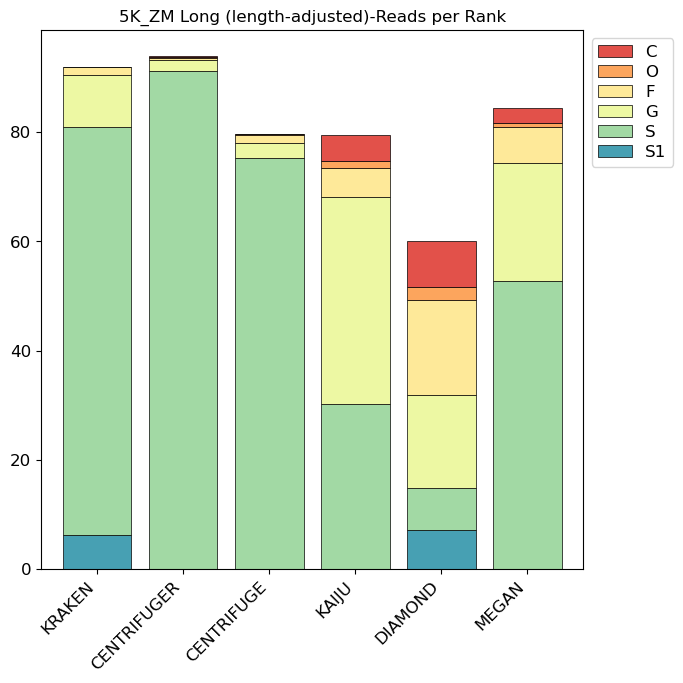

In [170]:
pal = sns.color_palette("Spectral_r")
ax = df_rank_read_count_it.plot.bar(stacked=True, figsize=(7,7), width=0.8, color=pal, 
                                    fontsize='large', edgecolor='black', linewidth=0.5, 
                                    title='{}-Reads per Rank'.format(label))
handles, labels = ax.get_legend_handles_labels()
ax.set_xticklabels(df_rank_read_count_it.index, rotation=45, ha='right')
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1,1), 
          fontsize='large', ncol=1, labelspacing=0.3)
ax.figure.savefig('{0}/{0} -Reads-per-Rank.pdf'.format(label), bbox_inches='tight')

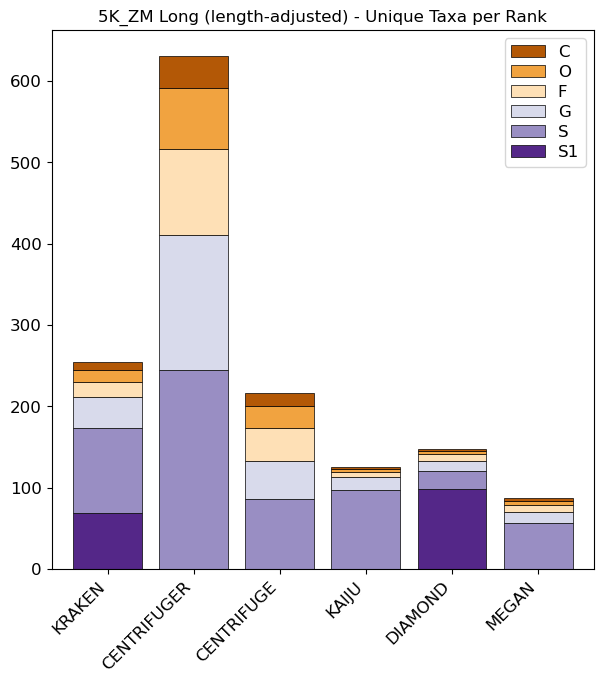

In [171]:
df_rank_taxa_count_it = df_rank_taxa_count.set_index('Rank').transpose().rename_axis('Sample', axis=1)
# not particularly useful because so many taxa recovered by centrifuge
pal_sp=sns.color_palette(["#542788","#998ec3","#d8daeb","#fee0b6","#f1a340","#b35806"])
#pal = sns.color_palette("gist_stern_r")
ax = df_rank_taxa_count_it.plot.bar(stacked=True, figsize=(7,7), width=0.8, color=pal_sp, 
                                    fontsize='large', edgecolor='black', linewidth=0.5,
                                    title = '{} - Unique Taxa per Rank'.format(label))
handles, labels = ax.get_legend_handles_labels()
ax.set_xticklabels(df_rank_taxa_count_it.index, rotation=45, ha='right')
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1,1), 
          fontsize='large', ncol=1, labelspacing=0.3)
ax.figure.savefig('{0}/{0} -Taxa-per-Rank.pdf'.format(label), bbox_inches='tight')


In [172]:
df_species_count.insert(0, 'Theoretical', theoretical_dists)
df_species_count_it = df_species_count.set_index('Species').transpose().rename_axis('Method', axis=1)
df_species_count_it_props = df_species_count_it.apply(lambda x: x*100/sum(x), axis=1)
df_species_count_it_props.to_csv("{0}/{0}-Species-Proportions.csv".format(label), index=True)

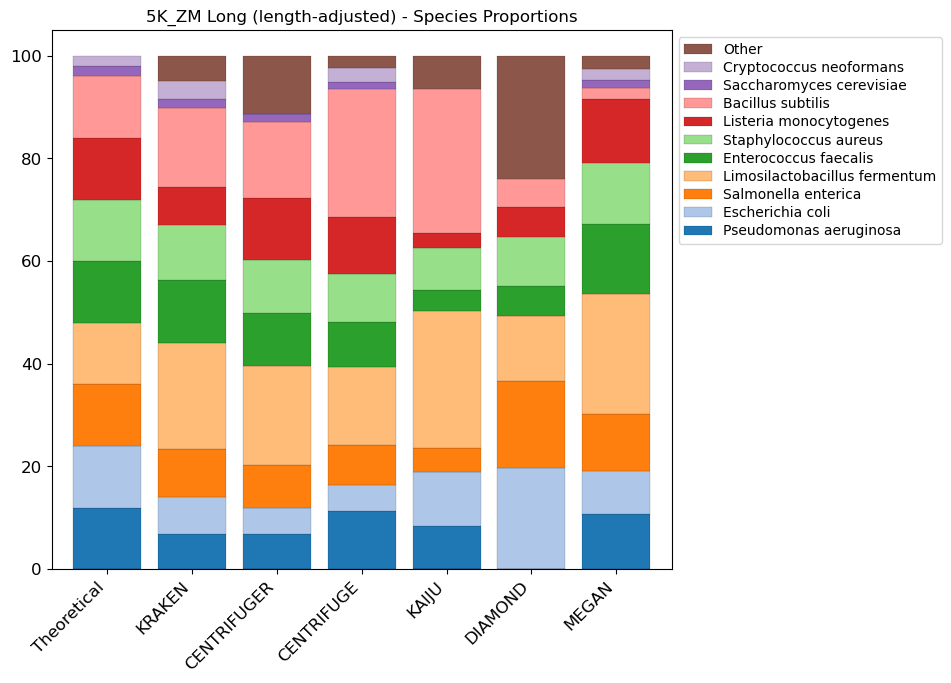

In [173]:
#pal = sns.color_palette("Paired")
pal = sns.color_palette("tab20")
ax = df_species_count_it_props.plot.bar(stacked=True, figsize=(8,7),
                                        width=0.8, color=pal, fontsize='large',
                                        edgecolor='black', linewidth=0.1,
                                        title='{} - Species Proportions'.format(label))
handles, labels = ax.get_legend_handles_labels()
ax.set_xticklabels(df_species_count_it.index, rotation=45, ha='right')
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1,1), 
          fontsize='medium', ncol=1, labelspacing=0.3)
ax.figure.savefig('{0}/{0}-Species-Proportions.pdf'.format(label), bbox_inches='tight')

In [174]:
df_genus_count.insert(0, 'Theoretical', theoretical_dists)
df_genus_count_it = df_genus_count.set_index('Genus').transpose().rename_axis('Method', axis=1)
df_genus_count_it_props = df_genus_count_it.apply(lambda x: x*100/sum(x), axis=1)
df_genus_count_it_props

Method,Pseudomonas,Escherichia,Salmonella,Limosilactobacillus,Enterococcus,Staphylococcus,Listeria,Bacillus,Saccharomyces,Cryptococcus,Other
Theoretical,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,2.000000,2.000000,0.000000
KRAKEN,7.994216,7.209254,9.667424,18.611857,11.464573,11.402603,12.724644,14.831646,1.631894,3.119190,1.342698
CENTRIFUGER,7.344633,7.449257,9.437121,18.874241,10.483365,11.069261,12.743252,14.940364,1.694915,1.632141,4.331450
CENTRIFUGE,8.092119,6.211705,9.317558,19.142193,11.620537,11.303613,13.205155,15.127826,1.626875,3.211494,1.140925
KAIJU,7.630641,6.264846,7.927553,21.763658,11.193587,11.104513,15.498812,17.844418,0.000000,0.000000,0.771971
DIAMOND,5.006502,8.387516,12.483745,8.062419,4.031209,15.149545,29.778934,9.947984,0.000000,0.000000,7.152146
MEGAN,8.283703,6.280455,8.310774,20.303194,11.613427,10.720087,14.022740,15.674066,1.813752,2.680022,0.297780


In [175]:
df_genus_count_it_props.to_csv("{0}/{0}-Genus-Proportions.csv".format(label), index=True)

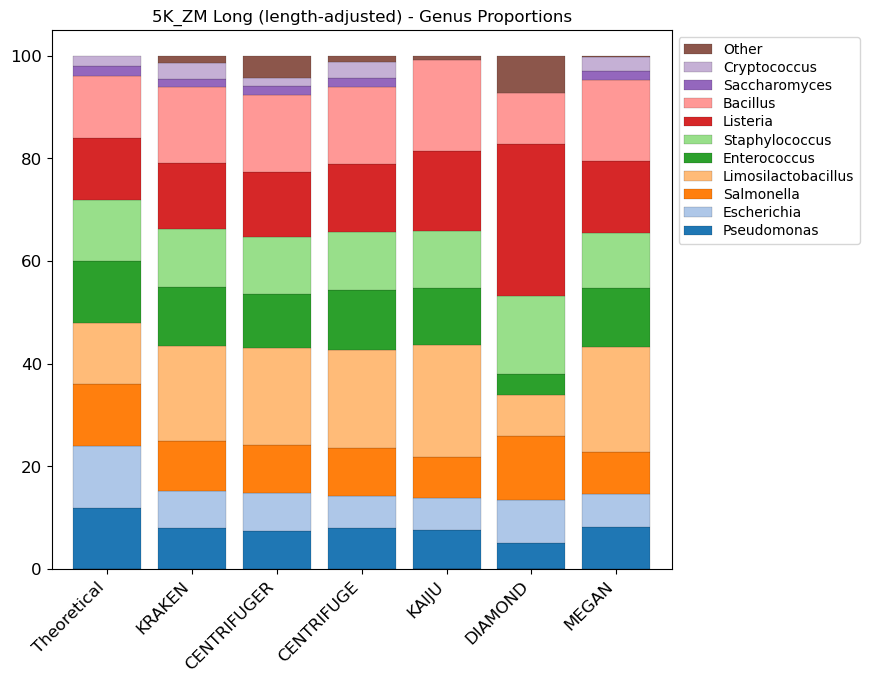

In [176]:
pal = sns.color_palette("tab20")
ax = df_genus_count_it_props.plot.bar(stacked=True, figsize=(8,7),
                                      width=0.8, color=pal, fontsize='large',
                                      edgecolor='black', linewidth=0.1,
                                      title='{} - Genus Proportions'.format(label))
handles, labels = ax.get_legend_handles_labels()
ax.set_xticklabels(df_genus_count_it.index, rotation=45, ha='right')
ax.legend(reversed(handles), reversed(labels), bbox_to_anchor=(1,1), fontsize='medium', ncol=1, labelspacing=0.3)
ax.figure.savefig('{0}/{0}-Genus-Proportions.pdf'.format(label), bbox_inches='tight')

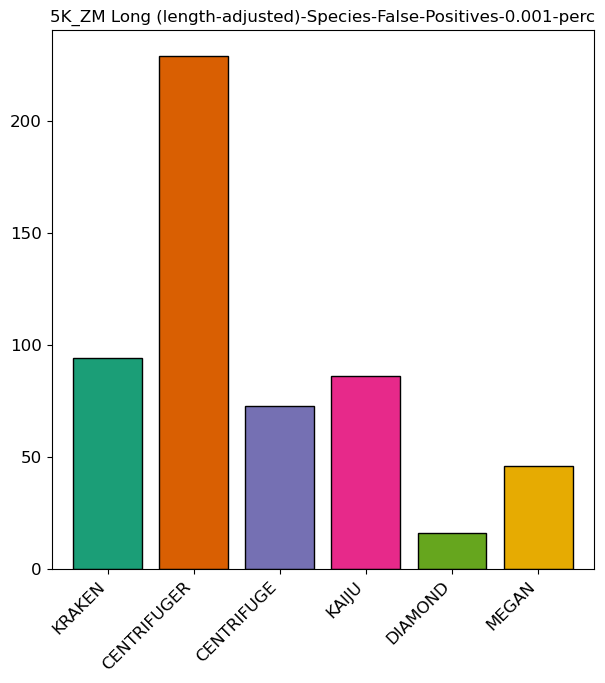

In [177]:
pal_class = sns.color_palette(['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02'])
ax = df_species_metrics['False Positives'].plot.bar(stacked=True, figsize=(7,7), width=0.8, color=pal_class, 
                                                    fontsize='large', edgecolor='black', linewidth=1,
                                                    title='{}-Species-False-Positives-{}'.format(label, dlevel))
ax.set_xticklabels(df_species_metrics.index, rotation=45, ha='right')
ax.figure.savefig('{0}/{0}-Species-False-Positives.{1}.pdf'.format(label, dlevel), bbox_inches='tight')

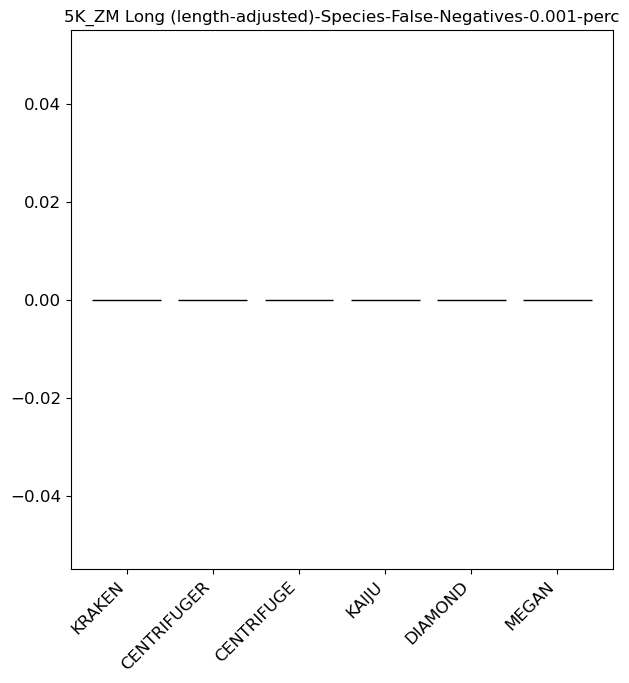

In [178]:
ax = df_species_metrics['False Negatives'].plot.bar(stacked=True, figsize=(7,7), width=0.8, color=pal_class, 
                                                    fontsize='large', edgecolor='black', linewidth=1,
                                                    title='{}-Species-False-Negatives-{}'.format(label, dlevel))
ax.set_xticklabels(df_species_metrics.index, rotation=45, ha='right')
ax.figure.savefig('{0}/{0}-Species-False-Negatives.{1}.pdf'.format(label, dlevel), bbox_inches='tight')

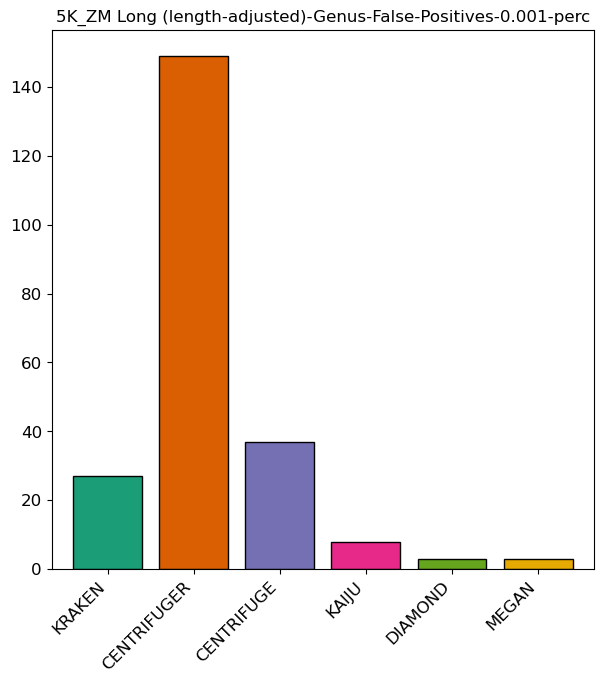

In [179]:
ax = df_genus_metrics['False Positives'].plot.bar(stacked=True, figsize=(7,7), width=0.8, color=pal_class, 
                                                  fontsize='large', edgecolor='black', linewidth=1,
                                                  title='{}-Genus-False-Positives-{}'.format(label, dlevel))
ax.set_xticklabels(df_genus_metrics.index, rotation=45, ha='right')
ax.figure.savefig('{0}/{0}-Genus-False-Positives.{1}.pdf'.format(label, dlevel), bbox_inches='tight')

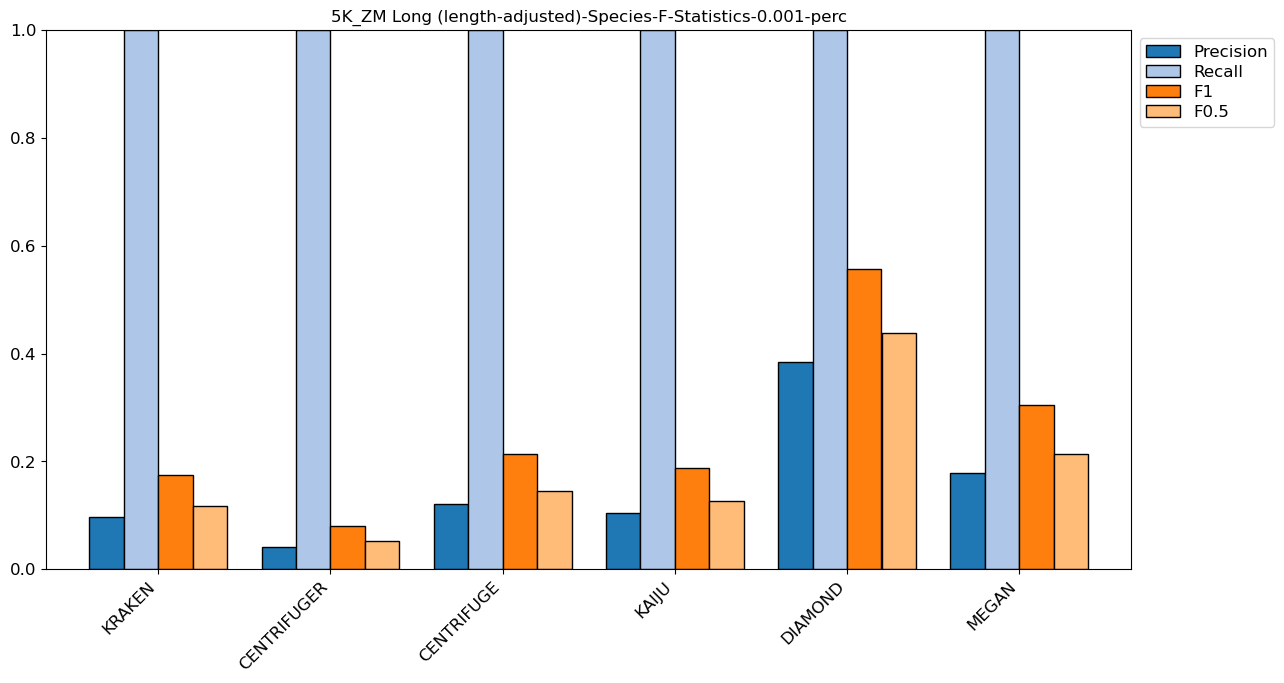

In [180]:
# plot precision, recall, f1 and f0.5 on same plot
pal = sns.color_palette("tab20", 4)
ax = df_species_metrics[["Precision", "Recall", "F1", "F0.5"]].plot.bar(stacked=False, figsize=(14,7), width=0.8, color=pal, 
                                                                        fontsize='large', edgecolor='black', linewidth=1, 
                                                                        ylim=(0,1), title='{}-Species-F-Statistics-{}'.format(label, dlevel))
ax.set_xticklabels(df_species_metrics.index, rotation=45, ha='right')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1,1), fontsize='large', ncol=1, labelspacing=0.3)
#ax.figure.savefig('{0}/{0}-Species-F-Statistics.{}.pdf'.format(label, dlevel), bbox_inches='tight')

/var/folders/_p/cpx_rt5n0bl5d6v6kpzddqrc0000gn/T/ipykernel_83800/801461913.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([round(x, 1) for x in ax.get_yticks()], size = 14)
/var/folders/_p/cpx_rt5n0bl5d6v6kpzddqrc0000gn/T/ipykernel_83800/801461913.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([round(x, 1) for x in ax.get_xticks()], size = 14)


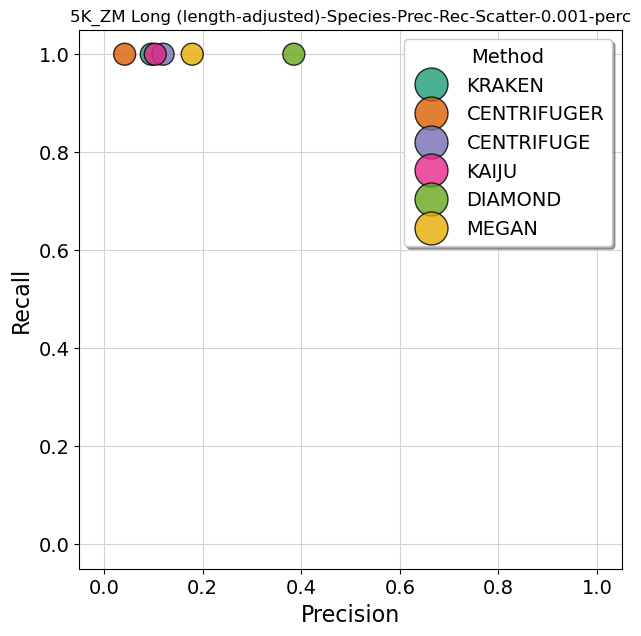

In [181]:
# plot precision vs recall, species
plt.figure(figsize=(7,7))
ax = sns.scatterplot(y="Recall", x="Precision", data=df_species_metrics, hue=df_species_metrics.index, s=250, palette=pal_class, 
                     alpha=0.8, edgecolor="black", linewidth=1)
plt.title('{}-Species-Prec-Rec-Scatter-{}'.format(label, dlevel))
ax.set_axisbelow(True)
ax.set(xlim=(-0.05,1.05))
ax.set(ylim=(-0.05,1.05))
ax.set_ylabel("Recall", fontsize=16)
ax.set_xlabel("Precision", fontsize=16)
ax.set_yticklabels([round(x, 1) for x in ax.get_yticks()], size = 14)
ax.set_xticklabels([round(x, 1) for x in ax.get_xticks()], size = 14)
ax.yaxis.grid(color='lightgray', linestyle='solid')
ax.xaxis.grid(color='lightgray', linestyle='solid')
ax.legend(fontsize = 14, bbox_to_anchor= (1, 1),title="Method", title_fontsize = 14,
          shadow = True, facecolor = 'white', markerscale=1.5)
ax.figure.savefig('{0}/{0}-Species-Prec-Rec-Scatter.{1}.pdf'.format(label, dlevel), bbox_inches='tight')

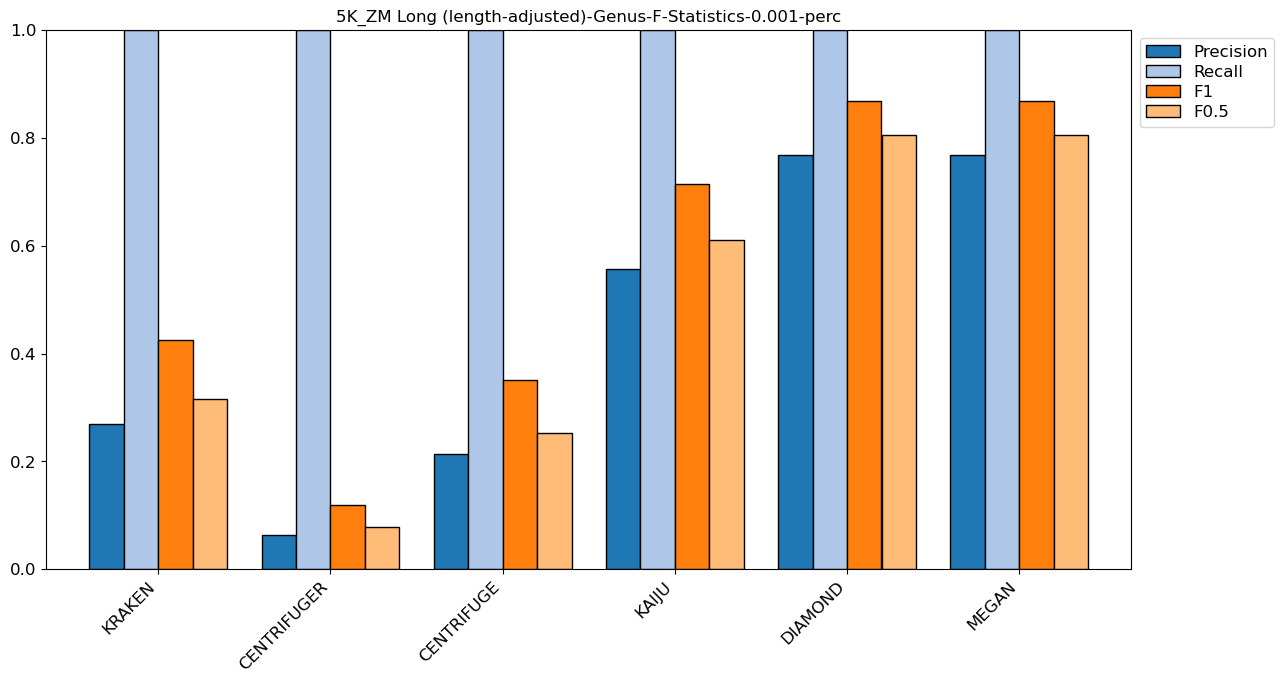

In [182]:
# plot precision, recall, f1 and f0.5 on same plot
pal = sns.color_palette("tab20", 4)
ax = df_genus_metrics[["Precision", "Recall", "F1", "F0.5"]].plot.bar(stacked=False, figsize=(14,7), width=0.8, color=pal, 
                                                                      fontsize='large', edgecolor='black', linewidth=1, 
                                                                      ylim=(0,1), title='{}-Genus-F-Statistics-{}'.format(label, dlevel))
ax.set_xticklabels(df_genus_metrics.index, rotation=45, ha='right')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1,1), fontsize='large', ncol=1, labelspacing=0.3)
#ax.figure.savefig('{0}/{0}-Genus-F-Statistics.{}.pdf'.format(label, dlevel), bbox_inches='tight')

/var/folders/_p/cpx_rt5n0bl5d6v6kpzddqrc0000gn/T/ipykernel_83800/2482340086.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([round(x, 1) for x in ax.get_yticks()], size = 14)
/var/folders/_p/cpx_rt5n0bl5d6v6kpzddqrc0000gn/T/ipykernel_83800/2482340086.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([round(x, 1) for x in ax.get_xticks()], size = 14)


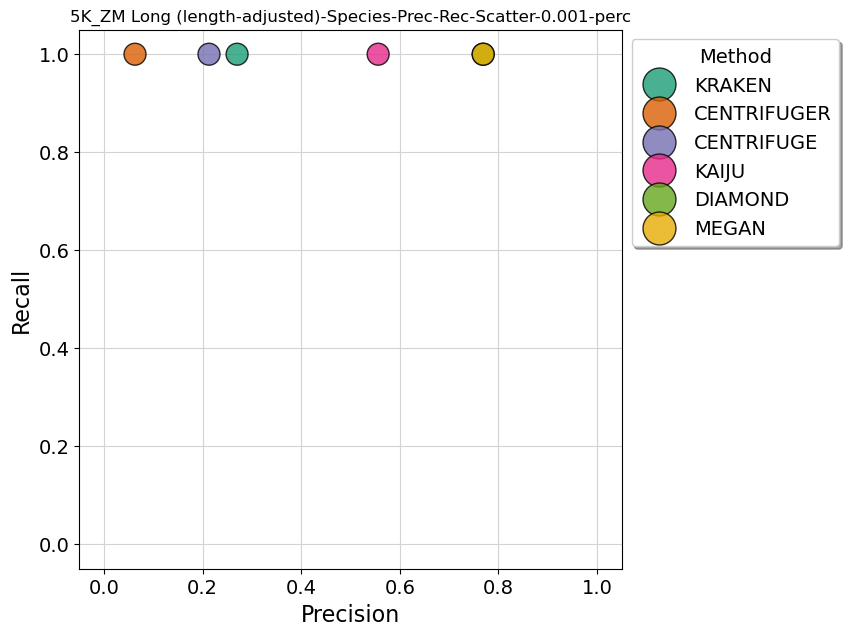

In [183]:
# plot precision vs recall, genus
plt.figure(figsize=(7,7))
ax = sns.scatterplot(y="Recall", x="Precision", data=df_genus_metrics, hue=df_genus_metrics.index, s=250, palette=pal_class, 
                     alpha=0.8, edgecolor="black", linewidth=1)
plt.title('{}-Species-Prec-Rec-Scatter-{}'.format(label, dlevel))
ax.set_axisbelow(True)
ax.set(xlim=(-0.05,1.05))
ax.set(ylim=(-0.05,1.05))
ax.set_ylabel("Recall", fontsize=16)
ax.set_xlabel("Precision", fontsize=16)
ax.set_yticklabels([round(x, 1) for x in ax.get_yticks()], size = 14)
ax.set_xticklabels([round(x, 1) for x in ax.get_xticks()], size = 14)
ax.yaxis.grid(color='lightgray', linestyle='solid')
ax.xaxis.grid(color='lightgray', linestyle='solid')
ax.legend(fontsize = 14, bbox_to_anchor= (1, 1),title="Method", title_fontsize = 14,
          shadow = True, facecolor = 'white', markerscale=1.5)
ax.figure.savefig('{0}/{0}-Genus-Prec-Rec-Scatter.{1}.pdf'.format(label, dlevel), bbox_inches='tight')

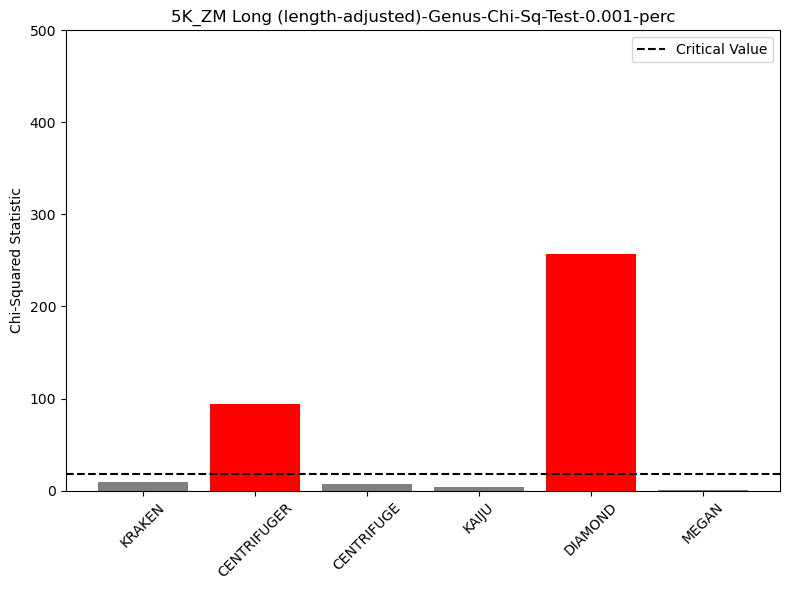

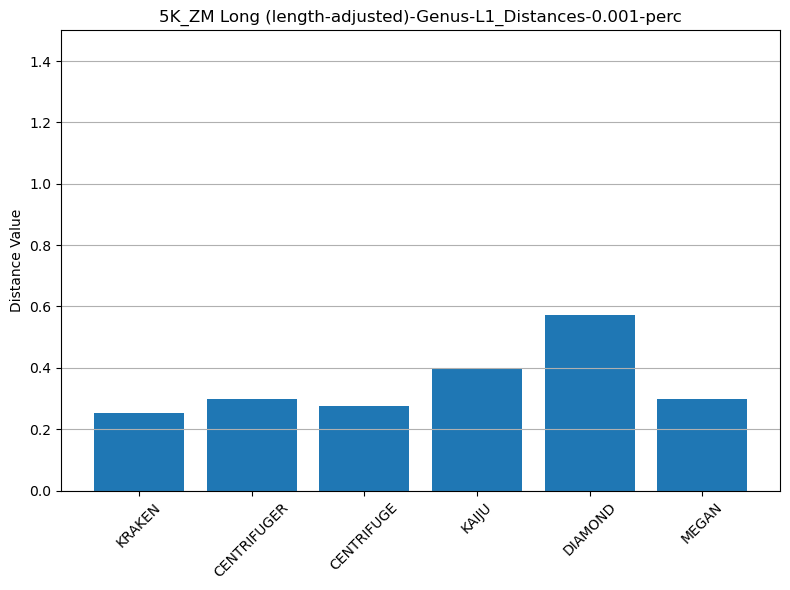

        method degrees chi_squared_stat crit_value p_value L1_distance  \
0       KRAKEN      10            123.2      18.31     0.0       0.375   
1  CENTRIFUGER      10           633.12      18.31     0.0      0.4267   
2   CENTRIFUGE      10            30.77      18.31  0.0006      0.3874   
3        KAIJU      10           205.58      18.31     0.0      0.7453   
4      DIAMOND      10          2879.57      18.31     0.0      0.7476   
5        MEGAN      10            35.95      18.31  0.0001      0.3267   

  Reject_null_p<0.0045 Chi2>crit  threshold                       dataset  
0                 True      True      0.001  5K_ZM Long (length-adjusted)  
1                 True      True      0.001  5K_ZM Long (length-adjusted)  
2                 True      True      0.001  5K_ZM Long (length-adjusted)  
3                 True      True      0.001  5K_ZM Long (length-adjusted)  
4                 True      True      0.001  5K_ZM Long (length-adjusted)  
5                 True   

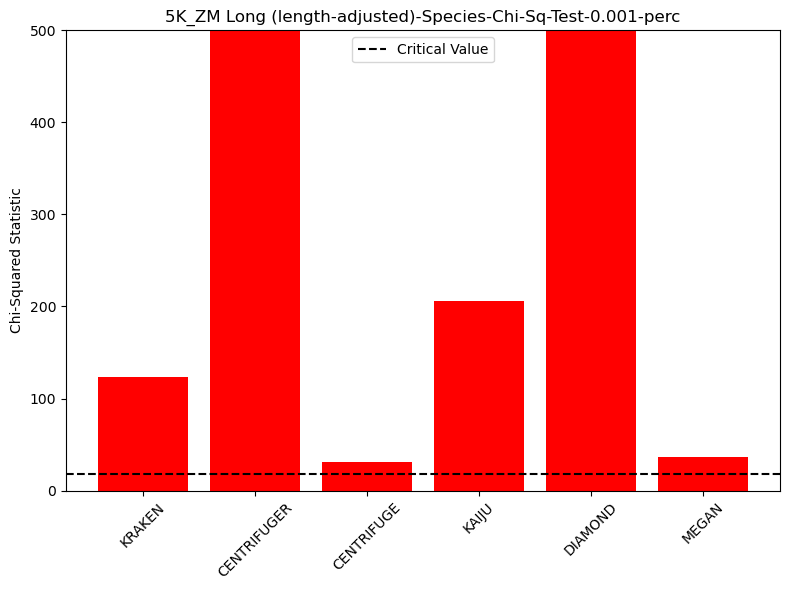

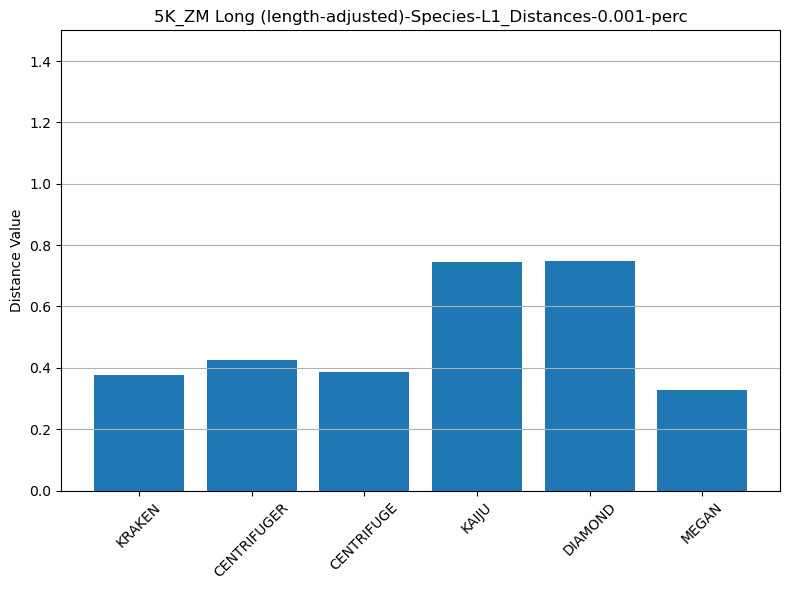

In [184]:

# Create df for GOF
sp_proportions=df_species_count_it_props.transpose().reset_index().rename(columns={'Method': 'Taxon'})
sp_proportions.loc[sp_proportions['Taxon'] == 'Other','Theoretical'] = 0.01
gn_proportions=df_genus_count_it_props.transpose().reset_index().rename(columns={'Method': 'Taxon'})
gn_proportions.loc[gn_proportions['Taxon'] == 'Other','Theoretical'] = 0.01
gn_proportions

# Goodness of test using pseudo frequencies

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chisquare, chi2

# ------------------------- Load + Format -------------------------
sp_proportions = df_species_count_it_props.transpose().reset_index().rename(columns={'Method': 'Taxon'})
sp_proportions.loc[sp_proportions['Taxon'] == 'Other', 'Theoretical'] = 0.01

gn_proportions = df_genus_count_it_props.transpose().reset_index().rename(columns={'Method': 'Taxon'})
gn_proportions.loc[gn_proportions['Taxon'] == 'Other', 'Theoretical'] = 0.01

# ------------------------- Chi-Squared Setup -------------------------
n_taxa = gn_proportions.shape[0]
alpha = 0.05
alpha_corrected = alpha / n_taxa
pseudo_total = 5  # Used to scale proportions to stay above 5 (as chi-sq should not be used for lower values)

# ------------------------- GENUS LEVEL -------------------------
results = {}

for method in fname_list:
    observed = gn_proportions[method].values
    expected = gn_proportions['Theoretical'].values

    # Normalize proportions
    observed_norm = observed / observed.sum()
    expected_norm = expected / expected.sum()

    # Convert proportions to pseudo-counts
    observed_counts = observed_norm * pseudo_total
    expected_counts = expected_norm * pseudo_total

    # L1 distance (between normalized proportions)
    l1_distance = abs(observed_norm - expected_norm).sum()

    # Chi-squared test
    chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)
    degrees = len(expected_counts) - 1
    crit_value = chi2.ppf(0.95, degrees)

    results[method] = {
        'degrees': degrees,
        'chi_squared_stat': round(chi2_stat, 2),
        'crit_value': round(crit_value, 2),
        'p_value': round(p_value, 4),
        'L1_distance': round(l1_distance, 4),
        'Reject_null_p<0.0045': p_value < alpha_corrected,
        'Chi2>crit': chi2_stat > crit_value
    }

gn_summary_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'method'})

# ------------------------- Plot Genus -------------------------
plt.figure(figsize=(8, 6))
plt.bar(gn_summary_df['method'], gn_summary_df['chi_squared_stat'],
        color=['red' if reject else 'gray' for reject in gn_summary_df['Reject_null_p<0.0045']])
plt.axhline(y=gn_summary_df['crit_value'].iloc[0], linestyle='--', color='black', label='Critical Value')
plt.ylabel('Chi-Squared Statistic')
plt.title(f'{label}-Genus-Chi-Sq-Test-{dlevel}')
plt.xticks(rotation=45)
plt.legend()
plt.ylim(top=500)
plt.tight_layout()
plt.show()



plt.figure(figsize=(8, 6))
plt.bar(gn_summary_df['method'], gn_summary_df['L1_distance'])
plt.title(f'{label}-Genus-L1_Distances-{dlevel}')
plt.ylabel("Distance Value")
plt.xticks(rotation=45)
plt.ylim(top=1.5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# ------------------------- SPECIES LEVEL -------------------------
results = {}

for method in fname_list:
    observed = sp_proportions[method].values
    expected = sp_proportions['Theoretical'].values

    observed_norm = observed / observed.sum()
    expected_norm = expected / expected.sum()

    observed_counts = observed_norm * pseudo_total
    expected_counts = expected_norm * pseudo_total

    l1_distance = abs(observed_norm - expected_norm).sum()
    chi2_stat, p_value = chisquare(f_obs=observed_counts, f_exp=expected_counts)
    degrees = len(expected_counts) - 1
    crit_value = chi2.ppf(0.95, degrees)

    results[method] = {
        'degrees': degrees,
        'chi_squared_stat': round(chi2_stat, 2),
        'crit_value': round(crit_value, 2),
        'p_value': round(p_value, 4),
        'L1_distance': round(l1_distance, 4),
        'Reject_null_p<0.0045': p_value < alpha_corrected,
        'Chi2>crit': chi2_stat > crit_value
    }

sp_summary_df = pd.DataFrame(results).T.reset_index().rename(columns={'index': 'method'})

# ------------------------- Add Threshold + dataset and Save -------------------------
sp_summary_df['threshold'] = threshold[dlevel]
gn_summary_df['threshold'] = threshold[dlevel]
sp_summary_df['dataset'] = label
gn_summary_df['dataset'] = label

print(sp_summary_df)
print(gn_summary_df)

sp_summary_df.to_csv(f"{label}/{label}-sp-chi-sqrd-{dlevel}.csv", index=False)
gn_summary_df.to_csv(f"{label}/{label}-gn-chi-sqrd-{dlevel}.csv", index=False)

# ------------------------- Plot Species -------------------------
plt.figure(figsize=(8, 6))
plt.bar(sp_summary_df['method'], sp_summary_df['chi_squared_stat'],
        color=['red' if reject else 'gray' for reject in sp_summary_df['Reject_null_p<0.0045']])
plt.axhline(y=sp_summary_df['crit_value'].iloc[0], linestyle='--', color='black', label='Critical Value')
plt.ylabel('Chi-Squared Statistic')
plt.title(f'{label}-Species-Chi-Sq-Test-{dlevel}')
plt.xticks(rotation=45)
plt.legend()
plt.ylim(top=500)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
plt.bar(sp_summary_df['method'], sp_summary_df['L1_distance'])
plt.title(f'{label}-Species-L1_Distances-{dlevel}')
plt.ylabel("Distance Value")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.ylim(top=1.5)
plt.tight_layout()
plt.show()
